# Pandas
## Loading data
We'll start by looking at loading data in Pandas. First we'll load a simple CSV file. The file looks like this:

```
sales_USD,year,genre
1561.2300000000005,2009,Rock
185.13,2009,Jazz
502.92000000000013,2009,Metal
466.29000000000025,2009,Alternative & Punk
```

We can load the data and look at the top and bottom of the file with `head` and `tail`:

In [4]:
import pandas as pd
df = pd.read_csv('chinook_data.csv')
df.head()

,sales_USD,year,genre
0,1561.23,2009,Rock
1,185.13,2009,Jazz
2,502.92,2009,Metal
3,466.29,2009,Alternative & Punk
4,13.86,2009,Rock And Roll


In [5]:
df.tail()

,sales_USD,year,genre
99,41.58,2013,World
100,6.93,2013,Hip Hop/Rap
101,25.86,2013,Science Fiction
102,157.15,2013,TV Shows
103,129.30,2013,Drama


Two of the fundamental data structures in pandas are Series and DataFrames. A series is 1D, while a DataFrame is 2D.

In [6]:
df['year']

0      2009
1      2009
2      2009
3      2009
4      2009
       ... 
99     2013
100    2013
101    2013
102    2013
103    2013
Name: year, Length: 104, dtype: int64

In [7]:
type(df['year'])

pandas.core.series.Series

In [8]:
type(df)

pandas.core.frame.DataFrame

The documentation for [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) has a lot of options, all described well in the docs. One useful option combination is for parsing dates:

In [9]:
df = pd.read_csv('chinook_data.csv', parse_dates=['year'], infer_datetime_format=True)
df.head()

,sales_USD,year,genre
0,1561.23,2009-01-01,Rock
1,185.13,2009-01-01,Jazz
2,502.92,2009-01-01,Metal
3,466.29,2009-01-01,Alternative & Punk
4,13.86,2009-01-01,Rock And Roll


The column on the left is the index. Since we did not specify an index column when loading the data, it was generated for us.

In [7]:
df.index

RangeIndex(start=0, stop=104, step=1)

Write back to CSV with new date format. Since the index was automatically created, we will not write it to the file with `index=False`.

In [10]:
df.to_csv('chinook_data_2.csv', index=False)

You could now try loading the file again, or looking at it in a text editor or Excel or OpenOffice.

Sometimes we have other separators in our CSV files, like a tab character (`\t`) or a pipe (`|`). We can specify the separator with `read_csv`:

In [11]:
df = pd.read_csv('chinook_data.csv', sep='\t')
df.head()

,"sales_USD,year,genre"
0,"1561.2300000000005,2009,Rock"
1,"185.13,2009,Jazz"
2,"502.92000000000013,2009,Metal"
3,"466.29000000000025,2009,Alternative & Punk"
4,"13.86,2009,Rock And Roll"


We can also leave the `sep` argument as `None`, and Python auto-detects it:

We can also read CSV from a URL. For example, we can load the CSV from the GitHub URL.

In [12]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Practical-Data-Science-with-Python/main/4-Chapter-4/data/chinook_data.csv'
df = pd.read_csv(url)
df.head()

,sales_USD,year,genre
0,1561.23,2009,Rock
1,185.13,2009,Jazz
2,502.92,2009,Metal
3,466.29,2009,Alternative & Punk
4,13.86,2009,Rock And Roll


Many files are stored in Excel format. Pandas comes with `read_excel` to handle those.

In [14]:
excel_data_df = pd.read_excel('chinook_data.xlsx', sheet_name='sales_data')
# print whole sheet data
print(excel_data_df)

2


In [15]:
df.to_excel('chinook_data_2.xlsx', index=False)

2


Similarly to CSVs, we can write Excel files with the same paradigm:

Pandas can be used to interface with SQL databases as well. Here, we collect data from the chinook.db SQLite file from Chapter 3. We must first make a connection to the database; here we use SQLAlchemy but we could also use a `sqlite3` connection.

## Load data from SQL
First, we create a connection with SQLalchemy, then load data into a DataFrame.  `read_sql_table` reads an entire table; to limit results or join tables, we can instead us `read_sql_query` with a query string (like in chapter 3).

In [17]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///chinook.db')
connection = engine.connect()

In [18]:
df = pd.read_sql_table('tracks', connection)
df.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


### Create DataFrame from Python lists.
We will use the bitcoin data from "test your knowledge" from chapter 3 -- the high prices for each year from 2013 to 2020.

In [19]:
btc_data = [(1138.5, '2013'),
 (919.24, '2014'),
 (466.01, '2015'),
 (981.7, '2016'),
 (19210.0, '2017'),
 (17169.0, '2018'),
 (12876.0, '2019'),
 (19131.0, '2020')]

We can create a DataFrame directly from a list of data like we have:

In [20]:
df = pd.DataFrame(data=btc_data, columns=['high_price', 'year'])

In [21]:
df.head()

,high_price,year
0,1138.50,2013
1,919.24,2014
2,466.01,2015
3,981.70,2016
4,19210.00,2017


We can also create a DataFrame from lists. First we need to get the two lists out of our data.

In [22]:
high_price = [b[0] for b in btc_data]
year = [b[1] for b in btc_data]

In [ ]:
df = pd.DataFrame(data={'high_price': high_price, 'year': year})
df.head()

### Convert JSON into a DataFrame.
We sometimes encounter JSON data when downloading data from a website or API. For a .json file, we can simply load it with `read_json`:

In [23]:
df = pd.read_json('bitcoin_price.json')
df.head()

,symbol,time,open,close,high,low,volume
0,btcusd,1364688000000,92.500000,93.033000,93.74999,91.00000,3083.079791
1,btcusd,1364774400000,93.250000,103.999000,105.90000,92.49999,5224.401313
2,btcusd,1364860800000,104.000000,118.229354,118.38670,99.00000,8376.527478
3,btcusd,1364947200000,117.958261,134.700000,146.88000,101.51088,12996.245072
4,btcusd,1365033600000,134.716560,132.899000,143.00000,119.00000,6981.668305


In [24]:
# write to csv to test out chunksize later
df.to_csv('bitcoin_price.csv', index=False)

We can also take JSON data and parse it into a pandas DataFrame:

In [25]:
import json

In [26]:
with open('bitcoin_price.json') as f:
    json_data = json.load(f)

In [27]:
json_data

[{'symbol': 'btcusd',
  'time': 1364688000000,
  'open': 92.5,
  'close': 93.033,
  'high': 93.74999,
  'low': 91.0,
  'volume': 3083.07979075},
 {'symbol': 'btcusd',
  'time': 1364774400000,
  'open': 93.25,
  'close': 103.999,
  'high': 105.9,
  'low': 92.49999,
  'volume': 5224.40131297},
 {'symbol': 'btcusd',
  'time': 1364860800000,
  'open': 104.0,
  'close': 118.22935407,
  'high': 118.3867,
  'low': 99.0,
  'volume': 8376.52747811002},
 {'symbol': 'btcusd',
  'time': 1364947200000,
  'open': 117.95826131,
  'close': 134.7,
  'high': 146.88,
  'low': 101.51088,
  'volume': 12996.2450721801},
 {'symbol': 'btcusd',
  'time': 1365033600000,
  'open': 134.71656,
  'close': 132.899,
  'high': 143.0,
  'low': 119.0,
  'volume': 6981.66830544001},
 {'symbol': 'btcusd',
  'time': 1365120000000,
  'open': 130.10001,
  'close': 142.3,
  'high': 145.0,
  'low': 128.25,
  'volume': 5234.88220325001},
 {'symbol': 'btcusd',
  'time': 1365206400000,
  'open': 142.8,
  'close': 143.05,
  'high'

In [29]:
df = pd.json_normalize(json_data)
df.head()

,symbol,time,open,close,high,low,volume
0,btcusd,1364688000000,92.500000,93.033000,93.74999,91.00000,3083.079791
1,btcusd,1364774400000,93.250000,103.999000,105.90000,92.49999,5224.401313
2,btcusd,1364860800000,104.000000,118.229354,118.38670,99.00000,8376.527478
3,btcusd,1364947200000,117.958261,134.700000,146.88000,101.51088,12996.245072
4,btcusd,1365033600000,134.716560,132.899000,143.00000,119.00000,6981.668305


### Reading big data in chunks
Sometimes we will be dealing with very large data files, like CSV files or other files that are in the 10s of GB. We can chunk through these files to manage memory. This is available for CSV, JSON, HDF, SAS, SQL, and Stata files.

There are about 2700 lines in the bitcoin data, so we get 3 chunks with `chunksize=1000`.

In [30]:
for chunk in pd.read_csv('bitcoin_price.csv', chunksize=1000):
    print(chunk.head())

   symbol           time        open       close       high        low  \
0  btcusd  1364688000000   92.500000   93.033000   93.74999   91.00000   
1  btcusd  1364774400000   93.250000  103.999000  105.90000   92.49999   
2  btcusd  1364860800000  104.000000  118.229354  118.38670   99.00000   
3  btcusd  1364947200000  117.958261  134.700000  146.88000  101.51088   
4  btcusd  1365033600000  134.716560  132.899000  143.00000  119.00000   

         volume  
0   3083.079791  
1   5224.401313  
2   8376.527478  
3  12996.245072  
4   6981.668305  
      symbol           time    open   close    high     low        volume
1000  btcusd  1451088000000  455.30  416.51  460.05  405.50  96491.880172
1001  btcusd  1451174400000  416.35  422.32  424.89  407.00  27798.815511
1002  btcusd  1451260800000  421.82  420.24  429.00  417.01  24284.330077
1003  btcusd  1451347200000  420.11  431.79  433.55  418.01  22073.563200
1004  btcusd  1451433600000  431.77  423.55  434.00  420.00  22247.596458
   

# Basic Exploratory Data Analysis (EDA) and Plotting with Pandas

## Numeric EDA

There are a few useful EDA functions in pandas to use often:

In [31]:
btc_df = pd.read_csv('bitcoin_price.csv')
btc_df.describe()

,time,open,close,high,low,volume
count,2.793000e+03,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000
mean,1.485643e+12,3867.990614,3874.250920,3981.107823,3742.840459,20916.237912
std,6.993213e+10,4275.693859,4283.044674,4407.995959,4122.644430,23815.877524
min,1.364688e+12,66.120000,66.120000,73.260000,0.010000,399.440586
25%,1.424995e+12,404.980000,407.270000,415.800000,388.011000,6072.663816
50%,1.485907e+12,1003.800000,1006.600000,1033.000000,960.100000,12773.963029
75%,1.546214e+12,7367.100000,7369.831761,7551.600000,7200.000000,26917.867083
max,1.606522e+12,19209.000000,19210.000000,19891.000000,18622.000000,274470.238234


In [32]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  2793 non-null   object 
 1   time    2793 non-null   int64  
 2   open    2793 non-null   float64
 3   close   2793 non-null   float64
 4   high    2793 non-null   float64
 5   low     2793 non-null   float64
 6   volume  2793 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 152.9+ KB


It's a little annoying to subtract the missing values from the total number of values, so we can use `.isna()` with `.sum()`:

In [33]:
btc_df.isna().sum()

symbol    0
time      0
open      0
close     0
high      0
low       0
volume    0
dtype: int64

We can find the number of rows and columns like so:

In [34]:
btc_df.shape

(2793, 7)

We might also want to see the datatypes of our DataFrame.

In [35]:
btc_df.dtypes

symbol     object
time        int64
open      float64
close     float64
high      float64
low       float64
volume    float64
dtype: object

We can also get some other stats, such as the median and mode:

In [36]:
btc_df.median()

C:\Users\admin\AppData\Local\Temp\ipykernel_16648\4032880124.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  btc_df.median()


time      1.485907e+12
open      1.003800e+03
close     1.006600e+03
high      1.033000e+03
low       9.601000e+02
volume    1.277396e+04
dtype: float64

In [37]:
btc_df['symbol'].mode()

0    btcusd
Name: symbol, dtype: object

It can also be useful to look at unique values and value counts. We'll look at some unique values and counts from the tracks from our chinook database.

In [38]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///chinook.db')
connection = engine.connect()
df = pd.read_sql_table('tracks', connection)

In [39]:
df.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [40]:
df['UnitPrice'].unique()

array([0.99, 1.99])

In [41]:
df['UnitPrice'].value_counts()

0.99    3290
1.99     213
Name: UnitPrice, dtype: int64

## Selecting Columns and Rows, and Filtering

In [42]:
btc_df = pd.read_csv('bitcoin_price.csv', index_col='time')
btc_df.head()

,symbol,open,close,high,low,volume
time,,,,,,
1364688000000,btcusd,92.500000,93.033000,93.74999,91.00000,3083.079791
1364774400000,btcusd,93.250000,103.999000,105.90000,92.49999,5224.401313
1364860800000,btcusd,104.000000,118.229354,118.38670,99.00000,8376.527478
1364947200000,btcusd,117.958261,134.700000,146.88000,101.51088,12996.245072
1365033600000,btcusd,134.716560,132.899000,143.00000,119.00000,6981.668305


We can view the index and columns like so.

In [43]:
print(btc_df.columns)
print(btc_df.index)

Index(['symbol', 'open', 'close', 'high', 'low', 'volume'], dtype='object')
Int64Index([1364688000000, 1364774400000, 1364860800000, 1364947200000,
            1365033600000, 1365120000000, 1365206400000, 1365292800000,
            1365379200000, 1365465600000,
            ...
            1605744000000, 1605830400000, 1605916800000, 1606003200000,
            1606089600000, 1606176000000, 1606262400000, 1606348800000,
            1606435200000, 1606521600000],
           dtype='int64', name='time', length=2793)


To select a column, we use square brackets with the column name. To select a row, we can use square brackets with the index value for that row.

In [44]:
# select a column
btc_df['volume']

time
1364688000000     3083.079791
1364774400000     5224.401313
1364860800000     8376.527478
1364947200000    12996.245072
1365033600000     6981.668305
                     ...     
1606176000000    14937.354569
1606262400000    13477.604832
1606348800000    34343.561464
1606435200000    11217.912098
1606521600000     3535.952749
Name: volume, Length: 2793, dtype: float64

In [45]:
# select the first row
btc_df.loc[1364688000000]

symbol         btcusd
open             92.5
close          93.033
high         93.74999
low              91.0
volume    3083.079791
Name: 1364688000000, dtype: object

In [46]:
# select a row and column
btc_df.loc[1364688000000, 'volume']

3083.07979075

In [47]:
# select a row with the number of the row (first, second, etc), not the index
btc_df.iloc[0]

symbol         btcusd
open             92.5
close          93.033
high         93.74999
low              91.0
volume    3083.079791
Name: 1364688000000, dtype: object

In [48]:
# select volume from the first row
btc_df.iloc[0, 5]

3083.07979075

We can also filter DataFrames much like the WHERE statement in SQL. For example, all rows with a volume above 3000 can be obtained like so:

In [49]:
btc_df[btc_df['volume'] > 3000]

,symbol,open,close,high,low,volume
time,,,,,,
1364688000000,btcusd,92.500000,93.033000,93.74999,91.00000,3083.079791
1364774400000,btcusd,93.250000,103.999000,105.90000,92.49999,5224.401313
1364860800000,btcusd,104.000000,118.229354,118.38670,99.00000,8376.527478
1364947200000,btcusd,117.958261,134.700000,146.88000,101.51088,12996.245072
1365033600000,btcusd,134.716560,132.899000,143.00000,119.00000,6981.668305
...,...,...,...,...,...,...
1606176000000,btcusd,18364.000000,19131.000000,19400.00000,18130.00000,14937.354569
1606262400000,btcusd,19133.654712,18727.000000,19497.00000,18500.00000,13477.604832
1606348800000,btcusd,18726.475677,17211.695801,18908.00000,16317.00000,34343.561464


The inner part of the statement returns a boolean Pandas Series:

In [50]:
btc_df['volume'] > 3000

time
1364688000000    True
1364774400000    True
1364860800000    True
1364947200000    True
1365033600000    True
                 ... 
1606176000000    True
1606262400000    True
1606348800000    True
1606435200000    True
1606521600000    True
Name: volume, Length: 2793, dtype: bool

In [51]:
type(btc_df['volume'] > 3000)

pandas.core.series.Series

A few other methods for filtering are useful: `isna`, `isin()` and `.str.contains()`.

In [52]:
df = pd.DataFrame(data={'text': ['A good dog!', 'A bad dog.', 'This cat is good.']})
df[df['text'].str.contains('good')]

,text
0,A good dog!
2,This cat is good.


We can negate a filter with `~`.

In [53]:
df[~df['text'].str.contains('good')]

,text
1,A bad dog.


For finding if a row contains a value in a set or list, we can use `isin`:

In [54]:
df = pd.DataFrame(data={'City': ['Los Angeles', 'San Francisco', 'New York', 'Omaha', 'Atlantis'],
                        'State': ['CA', 'CA', 'NY', 'NE', pd.NA]})
df[df['State'].isin(['CA', 'NY'])]

,City,State
0,Los Angeles,CA
1,San Francisco,CA
2,New York,NY


In [55]:
df[df['State'].isna()]

,City,State
4,Atlantis,<NA>


In [56]:
df[df['State'].notnull()]

,City,State
0,Los Angeles,CA
1,San Francisco,CA
2,New York,NY
3,Omaha,NE


Finally, we can combine filtering statements with & for "and" and | for "or". You should encapsulate each condition in parentheses.

In [57]:
df[(df['State'] == 'CA') & (df['City'] == 'Los Angeles')]

,City,State
0,Los Angeles,CA


## Plotting
Pandas can easily plot data, natively. Let's first plot a histogram of song lengths.

If plotting in IPython, simply running `%matplotlib` allows you to continue to run code after you've plotted something.

`%matplotlib inline` in a Jupyter Notebook shows the plots automatically, but they are not interactive.

In [58]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [59]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///chinook.db')
connection = engine.connect()
df = pd.read_sql_table('tracks', connection)

<IPython.core.display.Javascript object>


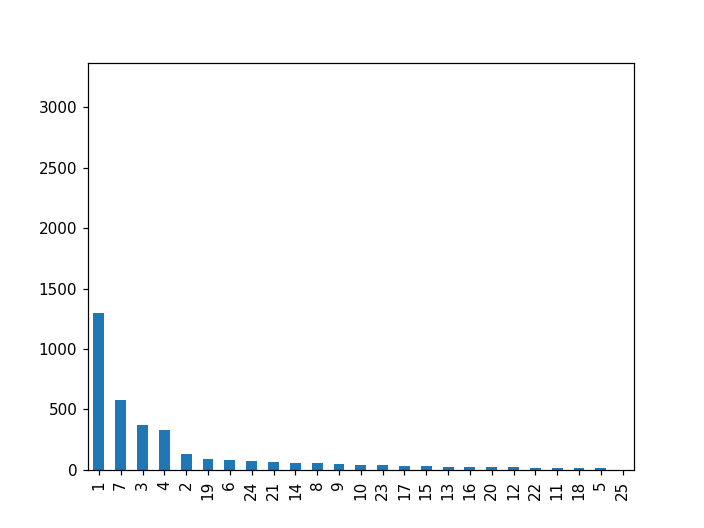

In [64]:
track_hist = df['Milliseconds'].hist()

A handy trick is to use `value_counts` with a barplot:

In [65]:
track_hist= df['GenreId'].value_counts().plot.bar()

If we have a timeseries, pandas can plot that very well too. It helps to have our index to be a time value.

In [67]:
btc_df = pd.read_csv('bitcoin_price.csv', index_col='time')

In [78]:
btc_df[['volume', 'low']]

,volume,low
time,,
1364688000000,3083.079791,91.00000
1364774400000,5224.401313,92.49999
1364860800000,8376.527478,99.00000
1364947200000,12996.245072,101.51088
1365033600000,6981.668305,119.00000
...,...,...
1606176000000,14937.354569,18130.00000
1606262400000,13477.604832,18500.00000
1606348800000,34343.561464,16317.00000


<IPython.core.display.Javascript object>


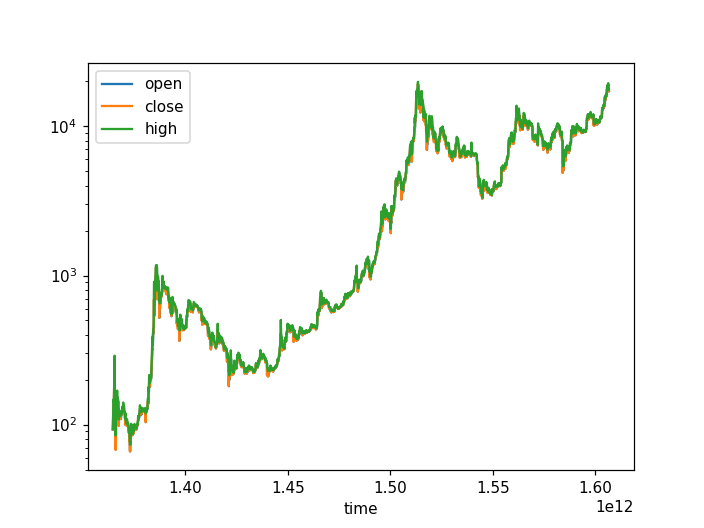

<AxesSubplot: xlabel='time'>

In [68]:
btc_df.drop(['volume', 'low'], axis=1).plot(logy=True)

# Preparing and Cleaning Data with Pandas

Setting and Resetting the Index

Math (adding, subtracting, etc)

Converting datatypes

Timestamps -- conversions

We can drop columns with .drop():

In [79]:
btc_df.drop('volume', axis=1)

,symbol,open,close,high,low
time,,,,,
1364688000000,btcusd,92.500000,93.033000,93.74999,91.00000
1364774400000,btcusd,93.250000,103.999000,105.90000,92.49999
1364860800000,btcusd,104.000000,118.229354,118.38670,99.00000
1364947200000,btcusd,117.958261,134.700000,146.88000,101.51088
1365033600000,btcusd,134.716560,132.899000,143.00000,119.00000
...,...,...,...,...,...
1606176000000,btcusd,18364.000000,19131.000000,19400.00000,18130.00000
1606262400000,btcusd,19133.654712,18727.000000,19497.00000,18500.00000
1606348800000,btcusd,18726.475677,17211.695801,18908.00000,16317.00000


Rows can be dropped with axis=0, which is the default:

In [81]:
# drops the first row which has this value for 'time'
btc_df.drop(1364688000000)

,symbol,open,close,high,low,volume
time,,,,,,
1364774400000,btcusd,93.250000,103.999000,105.9000,92.49999,5224.401313
1364860800000,btcusd,104.000000,118.229354,118.3867,99.00000,8376.527478
1364947200000,btcusd,117.958261,134.700000,146.8800,101.51088,12996.245072
1365033600000,btcusd,134.716560,132.899000,143.0000,119.00000,6981.668305
1365120000000,btcusd,130.100010,142.300000,145.0000,128.25000,5234.882203
...,...,...,...,...,...,...
1606176000000,btcusd,18364.000000,19131.000000,19400.0000,18130.00000,14937.354569
1606262400000,btcusd,19133.654712,18727.000000,19497.0000,18500.00000,13477.604832
1606348800000,btcusd,18726.475677,17211.695801,18908.0000,16317.00000,34343.561464


These drop and other transformation methods often have an 'inplace' argument which does not return a new dataframe, but modifies the existing one in-place.

In [82]:
btc_df.drop('volume', axis=1, inplace=True)

It can also be helpful to drop missing values. The easiest way is with dropna:

In [84]:
df = pd.DataFrame(data={'City': ['Los Angeles', 'San Francisco', 'New York', 'Omaha', 'Atlantis'],
                        'State': ['CA', 'CA', 'NY', 'NE', pd.NA]})

df

,City,State
0,Los Angeles,CA
1,San Francisco,CA
2,New York,NY
3,Omaha,NE
4,Atlantis,<NA>


In [85]:
df.dropna()

,City,State
0,Los Angeles,CA
1,San Francisco,CA
2,New York,NY
3,Omaha,NE


In [86]:
df.dropna(subset=['State'])

,City,State
0,Los Angeles,CA
1,San Francisco,CA
2,New York,NY
3,Omaha,NE


## Filling missing values

In [87]:
df.fillna({'City': df['City'].mode()[0], 'State': df['State'].mode()[0]})

,City,State
0,Los Angeles,CA
1,San Francisco,CA
2,New York,NY
3,Omaha,NE
4,Atlantis,CA


In [ ]:
df.City.mode()

In [88]:
df.State.mode()[0]

'CA'

## Detecting outliers

## swifter

# Using Essential pandas Data Wrangling Tools

## apply

## group by

## reduce and map

## datetimes and timezones

## Iterating through dataframes

# Understanding NumPy Basics

arrays
converting lists to arrays

matrices

shapes

dtypes

getting numpy from pandas

concatenating arrays

# Using NumPy Mathematical Functions

multiplication, addition

array addition

log

sin

euclidean distance, cosine distance